In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

# **Value iteration**

In [28]:
def value_iteration_for_gamblers(p_h, max_states_plus_1 = 100, horizon_l = 100):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    with_dummy_states = max_states_plus_1 + 1
    rewards = np.zeros(with_dummy_states)
    rewards[max_states_plus_1] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros((with_dummy_states, horizon_l))
    
    def one_step_lookahead(s,h, V, rewards):
        """
        Calculate the value for all action in a given state.
        """
        A = np.zeros(with_dummy_states) # can bet 0 to 100
        stakes = range(1, min(s, max_states_plus_1-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        
        if h<horizon_l-1: # when the time < horizon length
            for a in stakes:
                # rewards[s+a], rewards[s-a] are immediate rewards.
                # V[s+a], V[s-a] are values of the next states.
                # This is the core of the Bellman equation: The expected value of your action is 
                # the sum of immediate rewards and the value of the next state.
                A[a] = p_h * (rewards[s+a] + V[s+a,h+1]) + (1-p_h) * (rewards[s-a] + V[s-a,h+1])
        else: # in the final step of the horizon, V[H] = 0
            for a in stakes:
                A[a] = p_h * rewards[s+a] + (1-p_h) * rewards[s-a]
        
        return A
    
    # get the value functions V_h
    for h in range(horizon_l-1,-1,-1):
        print(h)
        # Update each state...
        for s in range(1, max_states_plus_1): # s = 0 means 0
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, h, V, rewards)
            best_action_value = np.max(A)
            # Update the value function.
            V[s,h] = best_action_value        
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros((with_dummy_states, horizon_l))
    for h in range(horizon_l-1,-1,-1):
        for s in range(1, max_states_plus_1): # money is [1,100]
            # One step lookahead to find the best action for this state
            A = one_step_lookahead(s, h, V, rewards)
            best_action = np.argmax(A)
            # Always take the best action
            policy[s,h] = best_action
    
    return policy, V

In [29]:
horizon_l = 100
max_states_plus_1 = 50
p_h = 0.45
nonrobust_opt_policy, nonrobust_opt_v = value_iteration_for_gamblers(p_h = p_h, max_states_plus_1= max_states_plus_1, horizon_l = horizon_l)

print("Optimized Policy:")
print(nonrobust_opt_policy[:,horizon_l-2])
print(nonrobust_opt_policy[max_states_plus_1,horizon_l-2])
print("Optimized Value Function:")
print(nonrobust_opt_v[:,0])

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
Optimized Policy:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
0.0
Optimized Value Function:
[0.         0.01057309 0.02349576 0.03836379 0.05221281 0.06770718
 0.08525286 0.10062004 0.11602846 0.13310116 0.15046039 0.16960066
 0.1894508  0.2083152  0.22360008 0.23973895 0.25784102 0.27570564
 0.29578036 0.31707336 0.33435642 0.3541381  0.37689035 0.39727596
 0.42100178 0.45       0.46292267 0.47871704 0.49688907 0.51381565
 0.53275321 0.55419794 0.57298005 0.59181256 0.6126792  0.63389603
 0.65728969 0.68155098 0.70460747 0.72328899 0.74301

# **generate samples for P_hat**

In [30]:
## generating samples for estimating P_h

## version 1
# def empirical_est(p_h,n=20, horizon_l = 100):
    
#     ns = [0, 1] # == s+a, s-a states
#     est_p = []
#     for h in range(horizon_l):
#         data = np.random.choice(ns, n, p = [p_h, 1-p_h])
    
#         est_ph = [len(np.where(data == 0)[0])*1.0/n,
#                  len(np.where(data == 1)[0])*1.0/n,]
#         est_p.append(est_ph)
#     print(np.shape(est_ph))
#     print(np.shape(est_p))
#     print(est_p[1][0])
#     print(est_p[1][1])
#     return est_p

## version 2: only generate one P_h,s,a
def empirical_est(p_h,n=20):
    
    ns = [0, 1] # == s+a, s-a states
    data = np.random.choice(ns, n, p = [p_h, 1-p_h])
    
    est_ph = [len(np.where(data == 0)[0])*1.0/n,
                 len(np.where(data == 1)[0])*1.0/n,]
   
    return est_ph

In [31]:
empirical_est(p_h=p_h,n=100)

[0.42, 0.58]

# **VI algorithm**

In [32]:
def vi_for_gamblers(p_h, max_states_plus_1 = 100, horizon_l = 100, c_r=0.2, uncer='true',num_samp=200):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    with_dummy_states = max_states_plus_1 + 1
    rewards = np.zeros(with_dummy_states)
    rewards[max_states_plus_1] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros((with_dummy_states, horizon_l))
    
    def one_step_lookahead(s,h, V, rewards, c_r):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(with_dummy_states)
        stakes = range(1, min(s, max_states_plus_1-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        
        
        if h<horizon_l-1: # when the time < horizon length
            for a in stakes:
                # rewards[s+a], rewards[s-a] are immediate rewards.
                # V[s+a], V[s-a] are values of the next states.
                # Robust Bellman equation:
                z = [rewards[s+a] + V[s+a,h+1], rewards[s-a] + V[s-a,h+1]]
                if uncer=='true':
                    A[a] = p_h * z[0] + (1-p_h) * z[1]
                else:
                    est_p = empirical_est(p_h,n= num_samp)
                    A[a] = est_p[0] * z[0] + (1- est_p[0]) * z[1]
                    
                    
        else: # in the final step of the horizon, V[H] = 0
            for a in stakes:
                z = [rewards[s+a], rewards[s-a]]
                if uncer=='true':
                    A[a] = p_h * z[0] + (1-p_h) * z[1]
                elif uncer=='klhat':
                    est_p = empirical_est(p_h,n= num_samp)
                    A[a] = est_p[0] * z[0] + (1- est_p[0]) * z[1]
        return A
    

    # get the value functions V_h
    for h in range(horizon_l-1,-1,-1):
#         print(h)
        # Update each state...
        for s in range(1, max_states_plus_1): # s = 0 means 0
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, h, V, rewards, c_r)
            best_action_value = np.max(A)
            # Update the value function.
            V[s,h] = best_action_value
            if np.isnan(V[s,h]):
                raise ValueError('nan in value.')
                break
            
    # show the difference between the estimation of the optimal value and the optimal value
    if uncer=='est':
        P_value=nonrobust_opt_v[:,0]
        P_hat_value = V[:,0]
        v_k_opt_diff = np.abs(P_value - P_hat_value)

#         ### LEARNING CURVE save data
#         np.savetxt('gambler_l1_cr_0.2_learning.csv', (range(1,itera), v_k_robopt_diff),\
#                                        delimiter=',')
        #### Temporary plot
#         plt.figure()
        plt.plot(range(with_dummy_states),v_k_opt_diff)
        plt.ylabel(r'$||V^*(s) - V(s)||$')
        plt.xlabel('index of states')
    

    # Create a deterministic policy using the optimal value function
    policy = np.zeros((with_dummy_states, horizon_l))
    for h in range(horizon_l-1,-1,-1):
        for s in range(1, max_states_plus_1): # money is [1,100]
            # One step lookahead to find the best action for this state
            A = one_step_lookahead(s, h, V, rewards, c_r)
            best_action = np.argmax(A)
            # Always take the best action
            policy[s,h] = best_action
    
    return policy, V

Optimized Policy:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15.
 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
0.0
Optimized Value Function:
[0.         0.05799549 0.12752271 0.17709679 0.22408071 0.30961197
 0.33599242 0.39010694 0.43448634 0.46452195 0.50913041 0.54628194
 0.58234349 0.60390994 0.62830477 0.64427315 0.67279504 0.69570647
 0.75785839 0.73561264 0.75966338 0.77233869 0.81788933 0.8108766
 0.82261566 0.83644615 0.849527   0.8627017  0.86957286 0.89270942
 0.89260241 0.90232343 0.91018894 0.92074649 0.92846454 0.93372275
 0.94113693 0.94671424 0.95179453 0.95766151 0.96199215 0.96714667
 0.97057242 0.97468905 0.98094982 0.98410519 0.98668131 0.99086194
 0.99350854 0.99629593 0.        ]


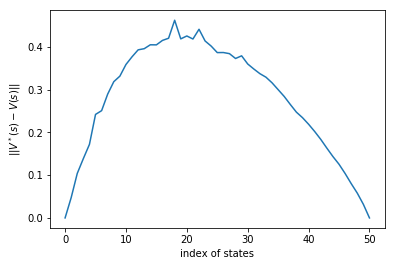

In [33]:
# horizon_l = 50
# max_states_plus_1 = 5
num_samp = 50
nonrobust_vi_policy, nonrobust_vi_v= vi_for_gamblers(p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='est', num_samp = num_samp)

print("Optimized Policy:")
print(nonrobust_vi_policy[:,horizon_l-2])
print(nonrobust_vi_policy[max_states_plus_1,horizon_l-2])
print("Optimized Value Function:")
print(nonrobust_vi_v[:,0])

# Value iteration with pessimism

In [62]:
def value_iteration_lcb_for_gamblers(p_h, max_states_plus_1 = 100, horizon_l = 100, num_samp=100):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    with_dummy_states = max_states_plus_1 + 1
    rewards = np.zeros(with_dummy_states)
    rewards[max_states_plus_1] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros((with_dummy_states, horizon_l))
    
    def bonus(h, s, a, p, n_sa, z):
        
        cb = 0.01
        b1 = horizon_l-h
        
        var_V = p*z[0]**2 + (1-p)*z[1]**2 - (p*z[0] + (1-p)*z[1])**2
        if abs(var_V<1e-6):
            var_V=0
    
        b2 = cb* horizon_l/n_sa + math.sqrt(cb*var_V/n_sa)
#         print('now the bonus are'+ str(b2))
        return np.min([b1,b2])

    def one_step_lookahead(s,h, V, rewards):
        """
        Calculate the value for all action in a given state.
        """
        A = np.zeros(with_dummy_states) # can bet 0 to 100
        stakes = range(1, min(s, max_states_plus_1-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        
        if h<horizon_l-1: # when the time < horizon length
            for a in stakes:
                # rewards[s+a], rewards[s-a] are immediate rewards.
                # V[s+a], V[s-a] are values of the next states.
                # This is the core of the Bellman equation: The expected value of your action is 
                # the sum of immediate rewards and the value of the next state.
                est_p = empirical_est(p_h,n= num_samp)
                z = [rewards[s+a] + V[s+a,h+1], rewards[s-a] + V[s-a,h+1]]
                A[a] = est_p[0] * z[0] + (1- est_p[0]) * z[1]
                b = bonus(h, s, a, est_p[0], num_samp, z)
                A[a] = np.max([A[a] - b,0])
        else: # in the final step of the horizon, V[H] = 0
            for a in stakes:
                est_p = empirical_est(p_h,n= num_samp)
                z = [rewards[s+a], rewards[s-a]]
                A[a] = est_p[0] * z[0] + (1-est_p[0]) * z[1]
                b = bonus(h, s, a, est_p[0], num_samp, z)
                A[a] = np.max([A[a] - b,0])
        return A
    
    # get the value functions V_h
    for h in range(horizon_l-1,-1,-1):
#         print(h)
        # Update each state...
        for s in range(1, max_states_plus_1): # s = 0 means 0
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, h, V, rewards)
            best_action_value = np.max(A)
            # Update the value function.
            V[s,h] = best_action_value        
    

    P_value=nonrobust_opt_v[:,0]
    P_hat_value = V[:,0]
    v_k_opt_diff = np.abs(P_value - P_hat_value)

#         ### LEARNING CURVE save data
#         np.savetxt('gambler_l1_cr_0.2_learning.csv', (range(1,itera), v_k_robopt_diff),\
#                                        delimiter=',')
    #### Temporary plot
#         plt.figure()
    plt.plot(range(with_dummy_states),v_k_opt_diff)
    plt.ylabel(r'$||V^*(s) - V(s)||$')
    plt.xlabel('index of states')
        
    # Create a deterministic policy using the optimal value function
    policy = np.zeros((with_dummy_states, horizon_l))
    for h in range(horizon_l-1,-1,-1):
        for s in range(1, max_states_plus_1): # money is [1,100]
            # One step lookahead to find the best action for this state
            A = one_step_lookahead(s, h, V, rewards)
            best_action = np.argmax(A)
            # Always take the best action
            policy[s,h] = best_action
    
    return policy, V

Optimized Policy:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13. 14. 12. 12. 14.
 13. 19. 11. 19. 16.  9.  6. 25.  1.  1.  2.  1. 20.  1.  6.  5.  4.  3.
  7.  1. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
0.0
Optimized Value Function:
[0.         0.01047885 0.0243972  0.03962444 0.05554809 0.0704596
 0.09083192 0.10511259 0.12401896 0.1399852  0.15924032 0.17716751
 0.19379564 0.22536459 0.23741828 0.25225159 0.27568574 0.29398886
 0.31180258 0.33440618 0.35642839 0.37279592 0.39233558 0.4176916
 0.44014238 0.45038713 0.4824073  0.5013347  0.51732934 0.53981974
 0.55315406 0.57480705 0.58626613 0.61666758 0.64000899 0.65451867
 0.6700555  0.69411001 0.70891828 0.72881963 0.75157098 0.77340023
 0.79536007 0.81807933 0.84043461 0.86718612 0.88709783 0.91389845
 0.94035232 0.96734943 0.        ]


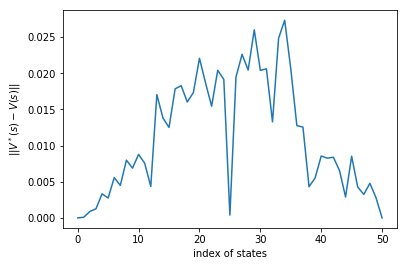

In [35]:
num_samp = 2000
nonrobust_lcb_opt_policy, nonrobust_lcb_opt_v = value_iteration_lcb_for_gamblers(p_h = p_h, max_states_plus_1= max_states_plus_1, horizon_l = horizon_l, num_samp = num_samp)

print("Optimized Policy:")
print(nonrobust_lcb_opt_policy[:,horizon_l-2])
print(nonrobust_lcb_opt_policy[max_states_plus_1,horizon_l-2])
print("Optimized Value Function:")
print(nonrobust_lcb_opt_v[:,0])

# get the value of a policy pi

In [42]:
def get_V_p_real(pi, p_h = 0.6, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='klhat',num_samp = num_samp,alg = 'lcb-vi', show = 'True'):
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    with_dummy_states = max_states_plus_1 + 1
    rewards = np.zeros(with_dummy_states)
    rewards[max_states_plus_1] = 1 
    
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros((with_dummy_states, horizon_l))
    
    
    def one_step_lookahead(s,h, V, rewards, c_r):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(with_dummy_states)
        stakes = range(1, min(s, max_states_plus_1-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        
        
        if h<horizon_l-1: # when the time < horizon length
            for a in stakes:
                # rewards[s+a], rewards[s-a] are immediate rewards.
                # V[s+a], V[s-a] are values of the next states.
                # Robust Bellman equation:
                z = [rewards[s+a] + V[s+a,h+1], rewards[s-a] + V[s-a,h+1]]
                if uncer=='true':
                    A[a] = p_h * z[0] + (1-p_h) * z[1]
                else:
                    est_p = empirical_est(p_h,n= num_samp)
                    A[a] = est_p[0] * z[0] + (1- est_p[0]) * z[1]
                    
                    
        else: # in the final step of the horizon, V[H] = 0
            for a in stakes:
                z = [rewards[s+a], rewards[s-a]]
                if uncer=='true':
                    A[a] = p_h * z[0] + (1-p_h) * z[1]
#                     print('true')
                elif uncer=='klhat':
                    est_p = empirical_est(p_h,n= num_samp)
                    A[a] = est_p[0] * z[0] + (1- est_p[0]) * z[1]
        return A
    
    # get the value functions V_h
    for h in range(horizon_l-1,-1,-1):
#         print(h)
        # Update each state...
        for s in range(1, max_states_plus_1): # s = 0 means 0
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, h,V, rewards, c_r)
            policy_action_value = A[int(pi[s][h])]
            # Update the value function.
            V[s,h] = policy_action_value
            if np.isnan(V[s,h]):
                raise ValueError('nan in value.')
                break
    
    # show the difference between the estimation of the optimal value and the optimal value
    P_value=nonrobust_opt_v[:,0]
    P_hat_value = V[:,0]
    v_k_opt_diff = np.abs(P_value - P_hat_value)

#         ### LEARNING CURVE save data
#         np.savetxt('gambler_l1_cr_0.2_learning.csv', (range(1,itera), v_k_robopt_diff),\
#                                        delimiter=',')
    #### Temporary plot
#         plt.figure()
    plt.plot(range(with_dummy_states),v_k_opt_diff)
    plt.ylabel(r'$V^\star(s) - V^{\pi}(s)$')
    plt.xlabel('index of states')
    if alg == 'lcb-vi':
        plt.legend('Ours')
    elif alg =='vi':
        plt.legend('value iteration')
        
    return V, v_k_opt_diff

0.45
LCB Policy Value Function:
[0.         0.01003596 0.02194955 0.03497673 0.04946874 0.06264703
 0.08389881 0.09616498 0.1133162  0.12664814 0.1440551  0.1604674
 0.17836942 0.20136717 0.21585919 0.23178129 0.24773471 0.26632796
 0.2809124  0.30981708 0.32519655 0.33966629 0.35964213 0.38239455
 0.40682945 0.43820236 0.45201685 0.46560521 0.48192746 0.4984274
 0.52036505 0.54437405 0.56244611 0.57905411 0.59671169 0.62320728
 0.64476596 0.67198258 0.69594536 0.70920881 0.73464143 0.74932481
 0.77259768 0.80548183 0.8275699  0.84996799 0.87737353 0.89814681
 0.93136365 0.95940164 0.        ]
[0.         0.01009245 0.02230213 0.03644156 0.04910182 0.06539084
 0.07772606 0.09364151 0.10993053 0.12820298 0.13921562 0.15472014
 0.18644179 0.20727409 0.21960931 0.23523678 0.25181378 0.26154539
 0.28007595 0.29786511 0.32012245 0.33923313 0.36023156 0.38366023
 0.40449253 0.43514739 0.45456319 0.47263509 0.49453969 0.50283145
 0.52992214 0.5391031  0.55052159 0.57576964 0.60507605 0.624519

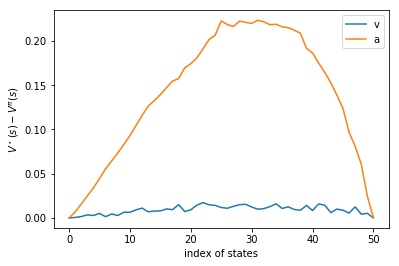

In [37]:
# get the real value of the VI-LCB algorithm
fig = plt.figure()
print(p_h)
lcb_pi_V_p_real, lcb_pi_V_p_real_diff = get_V_p_real(nonrobust_lcb_opt_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = num_samp, alg = 'lcb-vi',show = 'True')
print("LCB Policy Value Function:")
print(lcb_pi_V_p_real[:,0])
print(lcb_pi_V_p_real[:,1])

# get the real value of vanilla VI algorithm
VI_pi_V_p_real, VI_pi_V_p_real_diff = get_V_p_real(nonrobust_vi_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = num_samp, alg = 'vi',show = 'True')
print("VI Policy Value Function:")
print(VI_pi_V_p_real[:,0])
print(VI_pi_V_p_real[:,1])

print(lcb_pi_V_p_real_diff)
print(VI_pi_V_p_real_diff)


# fig.savefig('compare-LCB-or-VI.png',bbox_inches='tight', dpi=600)



# Figure of performance diff w.r.t state

seed -  0
seed -  1
seed -  2
seed -  3
seed -  4
seed -  5
seed -  6
seed -  7
seed -  8
seed -  9


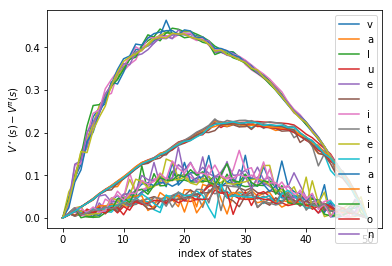

In [63]:

s_range = range(10)
num_samp = 50
diff_lcbvi_seeds_s = np.zeros((len(s_range),max_states_plus_1+1))
diff_vi_seeds_s = np.zeros((len(s_range),max_states_plus_1+1))
for s in s_range:
    print("seed - ", s)
    diff_lcbvi_values = []
    diff_vi_values = []
    np.random.seed(s)
    ## calculate the VI-LCB policy
    lcb_opt_policy, lcb_opt_v= value_iteration_lcb_for_gamblers(p_h = p_h, max_states_plus_1= max_states_plus_1, horizon_l = horizon_l, num_samp = num_samp)
    # get the real value of the DR-VI-LCB algorithm
    lcb_pi_V_p_real, lcb_pi_V_p_real_diff = get_V_p_real(lcb_opt_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = num_samp, alg = 'lcb-vi', show = False)
    diff_lcbvi_values = lcb_pi_V_p_real_diff
        
    ## calculate the VI policy
    nonrobust_vi_policy, nonrobust_vi_v= vi_for_gamblers(p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='est', num_samp = num_samp)
    # get the real value of the DR-VI-LCB algorithm
    vi_pi_V_p_real, vi_pi_V_p_real_diff = get_V_p_real(nonrobust_vi_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = num_samp, alg = 'vi', show = False)
    diff_vi_values = vi_pi_V_p_real_diff
#         pol.append(temp_pol)
    diff_lcbvi_seeds_s[s,:] = diff_lcbvi_values
    diff_vi_seeds_s[s,:] = diff_vi_values



[0.00000000e+00 1.73472348e-18 9.04300565e-03 2.75533259e-03
 3.07269079e-03 3.92913993e-03 3.75173791e-03 6.17363406e-03
 5.01880291e-03 6.39098114e-03 8.37433910e-03 8.63877275e-03
 6.12286738e-03 7.19606563e-03 9.45965428e-03 1.13686904e-02
 1.20887540e-02 8.82553212e-03 7.53776050e-03 1.05812833e-02
 1.28536343e-02 7.53908132e-03 1.60874812e-02 1.53694139e-02
 1.71092807e-02 2.30493347e-02 1.69322415e-02 1.78709842e-02
 1.58729378e-02 1.27103996e-02 6.56784769e-03 1.21672634e-02
 1.14535201e-02 9.12182400e-03 1.06632087e-02 8.31333933e-03
 1.06676746e-02 1.12327598e-02 7.23441425e-03 8.86418127e-03
 9.87440294e-03 6.83908666e-03 8.32375510e-03 6.54601027e-03
 6.83677907e-03 6.76609565e-03 4.46566895e-03 3.48075199e-03
 2.14097558e-03 1.03162123e-03 0.00000000e+00]
[0.00000000e+00 9.50365554e-05 2.21921097e-04 3.67601744e-04
 4.49472934e-04 1.15908001e-03 7.92617944e-04 1.17744388e-03
 2.77998787e-03 3.69963431e-03 1.60079372e-03 1.54265487e-03
 1.66583485e-03 1.62610764e-03 2.22421

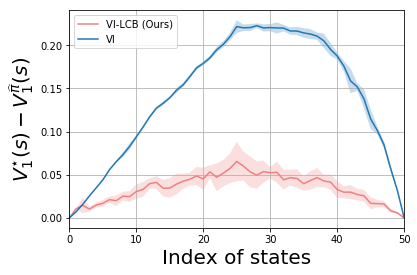

In [64]:
#---------- figure of robust VI vs robust VI-LCB w.r.t N with p_h = 0.6
colorbar = ['C2', 'lightcoral', 'C0', 'mediumpurple']
fig = plt.figure()
# plot VI-LCB
mean_lcbvi_vals = np.mean(diff_lcbvi_seeds_s,axis=0)
std_lcbvi_vals = np.std(diff_lcbvi_seeds_s,axis=0)
print(std_lcbvi_vals)
plt.plot(range(max_states_plus_1+1),mean_lcbvi_vals, color = colorbar[1], label='VI-LCB (Ours)')
plt.fill_between(range(max_states_plus_1+1), mean_lcbvi_vals - std_lcbvi_vals, mean_lcbvi_vals + std_lcbvi_vals, facecolor = colorbar[1], alpha = 0.25)

# plot LCB
mean_vi_vals = np.mean(diff_vi_seeds_s,axis=0)
std_vi_vals = np.std(diff_vi_seeds_s,axis=0)
print(std_vi_vals)
plt.plot(range(max_states_plus_1+1),mean_vi_vals, color = colorbar[2], label='VI')
plt.fill_between(range(max_states_plus_1+1), mean_vi_vals - std_vi_vals, mean_vi_vals + std_vi_vals, facecolor = colorbar[2], alpha = 0.25)

plt.xlabel("Index of states",fontsize=20)
plt.ylabel(r'$V_1^{\star}(s) - V_1^{\widehat{\pi}}(s)$',fontsize=20)
plt.legend(loc = 'upper left')
plt.xlim([0,50])
plt.grid()
plt.show()
fig.savefig('offline-model-based_state.pdf',format='pdf', bbox_inches='tight')

# Uncomment this if you want to save data
# np.savetxt('gambler_kl_c_r_0.1_s.csv', (mean_vi_vals, std_vi_vals, mean_lcbvi_vals,std_lcbvi_vals),\
#                                    delimiter=',')

# figure of performance diff w.r.t N

In [44]:
a = math.log(2.718281828459)
b = [math.floor(pow(math.e, i)) for i in np.arange(4.5, 10.5, 0.5)]
print(b)

[90, 148, 244, 403, 665, 1096, 1808, 2980, 4914, 8103, 13359, 22026]


seed -  0
seed -  1
seed -  2


Text(0,0.5,'$V^\\star(\\rho) - V^{\\widehat{\\pi}}(\\rho)$')

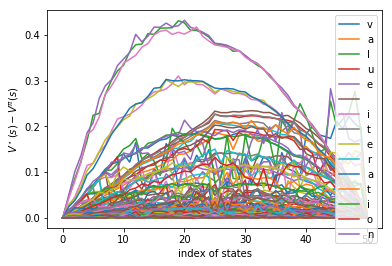

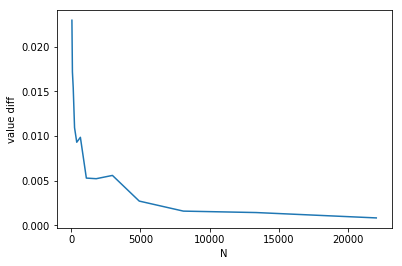

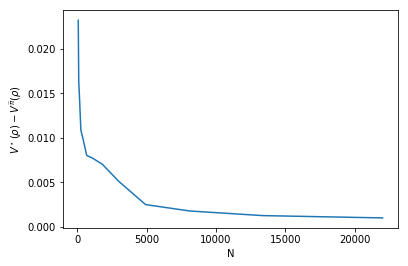

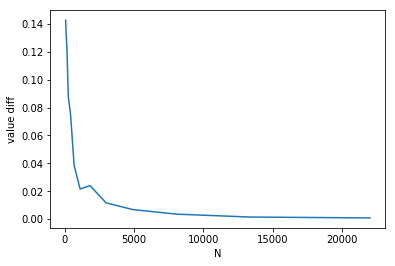

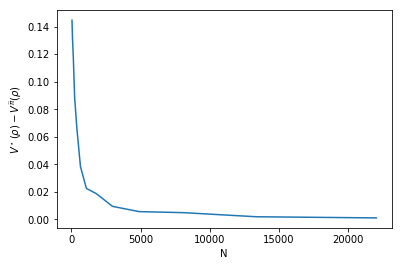

In [45]:
rho = np.random.uniform(0,1,max_states_plus_1+1)
rho = rho/np.sum(rho)
# n_range = [100, 500, 3000, 5000, 7000]

n_range = [math.floor(pow(math.e, i)) for i in np.arange(4, 10.5, 0.5)]
s_range = range(3)
diff_lcbvi_seeds = np.zeros((len(s_range),len(n_range)))
diff_vi_seeds = np.zeros((len(s_range),len(n_range)))
for s in s_range:
    print("seed - ", s)
    diff_lcbvi_values = []
    diff_vi_values = []
#     pol = []
    for n in n_range:
        np.random.seed(s+n)
        ## calculate the VI-LCB policy
        lcb_opt_policy, lcb_opt_v= value_iteration_lcb_for_gamblers(p_h = p_h, max_states_plus_1= max_states_plus_1, horizon_l = horizon_l, num_samp = n)
        # get the real value of the DR-VI-LCB algorithm
        lcb_pi_V_p_real, lcb_pi_V_p_real_diff = get_V_p_real(lcb_opt_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = n, alg = 'lcb-vi', show = False)
        diff_lcbvi_values.append(np.dot(rho,lcb_pi_V_p_real_diff))
        
        ## calculate the VI policy
        nonrobust_vi_policy, nonrobust_vi_v= vi_for_gamblers(p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='est', num_samp = n)
        # get the real value of the DR-VI-LCB algorithm
        vi_pi_V_p_real, vi_pi_V_p_real_diff = get_V_p_real(nonrobust_vi_policy, p_h = p_h, max_states_plus_1 = max_states_plus_1, horizon_l = horizon_l, c_r = 0.1, uncer='true',num_samp = n, alg = 'vi', show = False)
        diff_vi_values.append(np.dot(rho,vi_pi_V_p_real_diff))
#         pol.append(temp_pol)
    diff_lcbvi_seeds[s,:] = diff_lcbvi_values
    diff_vi_seeds[s,:] = diff_vi_values

# plot lcb-vi
plt.figure()
plt.plot(n_range,diff_lcbvi_values)
plt.xlabel("N")
plt.ylabel("value diff")

fig = plt.figure()
plt.plot(n_range,np.mean(diff_lcbvi_seeds,axis=0))
plt.xlabel("N")
plt.ylabel(r'$V^\star(\rho) - V^{\widehat{\pi}}(\rho)$')

fig.savefig('test_lcbvi_N.png')

# plot vi
plt.figure()
plt.plot(n_range,diff_vi_values)
plt.xlabel("N")
plt.ylabel("value diff")

fig = plt.figure()
plt.plot(n_range,np.mean(diff_vi_seeds,axis=0))
plt.xlabel("N")
plt.ylabel(r'$V^\star(\rho) - V^{\widehat{\pi}}(\rho)$')

# fig.savefig('offline-model-based_vi_N.pdf',format='pdf', bbox_inches='tight')

In [ ]:
## near_model import LinearRegression
#---------- figure of robust VI vs robust VI-LCB w.r.t N with p_h = 0.6
colorbar = ['C2', 'lightcoral', 'C0', 'mediumpurple']
fig = plt.figure()

# plot VI-LCB
mean_lcbvi_vals = np.mean(diff_lcbvi_seeds,axis=0)
std_lcbvi_vals = np.std(diff_lcbvi_seeds,axis=0)
print(std_lcbvi_vals)
plt.plot(n_range, mean_lcbvi_vals, color = colorbar[1], label='VI-LCB (Ours)')
plt.fill_between(n_range, mean_lcbvi_vals - std_lcbvi_vals, mean_lcbvi_vals + std_lcbvi_vals, facecolor = colorbar[1], alpha = 0.25)


# plot LCB
mean_vi_vals = np.mean(diff_vi_seeds,axis=0)
std_vi_vals = np.std(diff_vi_seeds,axis=0)
print(std_vi_vals)
plt.plot(n_range,mean_vi_vals, color = colorbar[2], label='VI')
plt.fill_between(n_range, mean_vi_vals - std_vi_vals, mean_vi_vals + std_vi_vals, facecolor = colorbar[2], alpha = 0.25)




plt.xlabel("Sample size N",fontsize=20)
plt.ylabel(r'$V_1^{\star}(\rho) - V_1^{\widehat{\pi}}(\rho)$',fontsize=20)
plt.legend(loc = 'upper right')
# plt.xlim([100,5000])
plt.grid()
plt.xscale('log')
plt.show()
fig.savefig('offline-model-based_vi_N-compare.pdf',format='pdf', bbox_inches='tight')

# # Uncomment this if you want to save data
# np.savetxt('gambler_kl_c_r_0.1_N.csv', (n_range, mean_vi_vals, std_vi_vals, mean_lcbvi_vals,std_lcbvi_vals),\
#                                    delimiter=',')

#---------- figure of robust VI vs robust VI-LCB w.r.t log(N)
colorbar = ['C2', 'lightcoral', 'C0', 'mediumpurple']
fig = plt.figure()


start_show = 0
end_show = len(n_range)
# plot VI-LCB
mean_lcbvi_vals = np.mean(diff_lcbvi_seeds,axis=0)
std_lcbvi_vals = np.std(diff_lcbvi_seeds,axis=0)
# print(std_lcbvi_vals)
plt.plot(np.log(n_range[start_show:end_show]), np.log(mean_lcbvi_vals[start_show:end_show]), color = colorbar[1], label='VI-LCB (Ours)')
plt.fill_between(np.log(n_range[start_show:end_show]), np.log(mean_lcbvi_vals[start_show:end_show] - std_lcbvi_vals[start_show:end_show]),
                 np.log(mean_lcbvi_vals[start_show:end_show] + std_lcbvi_vals[start_show:end_show]), facecolor = colorbar[1], alpha = 0.25)

# print((np.log(mean_lcbvi_vals[end_show-1]) - np.log(mean_lcbvi_vals[start_show])))
# print( (np.log(mean_lcbvi_vals[end_show-1]) - np.log(mean_lcbvi_vals[start_show]))/
#       (np.log(n_range[end_show-1])-np.log(n_range[start_show])))

# # plot LCB
# mean_vi_vals = np.mean(diff_vi_seeds,axis=0)
# std_vi_vals = np.std(diff_vi_seeds,axis=0)
# # print(std_vi_vals)
# plt.plot(np.log(n_range[start_show:end_show]), np.log(mean_vi_vals[start_show:end_show]), color = colorbar[2], label='VI')
# plt.fill_between(np.log(n_range[start_show:end_show]), np.log(mean_vi_vals[start_show:end_show] - std_vi_vals[start_show:end_show]),
#                  np.log(mean_vi_vals[start_show:end_show] + std_vi_vals[start_show:end_show]), facecolor = colorbar[2], alpha = 0.25)



# plot the fitted line
model = LinearRegression()
model.fit(np.log(n_range[start_show:end_show]).reshape((-1, 1)), np.log(mean_lcbvi_vals[start_show:end_show]))
# print(model.coef_)
y_pred = model.intercept_ + model.coef_ * np.log(n_range[start_show:end_show]).reshape((-1, 1))
plt.plot(np.log(n_range[start_show:end_show]),y_pred,color = colorbar[3], label='Linear: slope$=-0.505$ ')

plt.xlabel("log(sample size N)",fontsize=20)
plt.ylabel(r'$\log(V_1^{\star}(\rho) - V_1^{\widehat{\pi}}(\rho))$',fontsize=20)
plt.legend(loc = 'upper right')
# plt.xlim([100,5000])

# plt.xlim([5.5,7.5])
plt.grid()
plt.show()

fig.savefig('offline-model-based_vi_N-line.pdf',format='pdf', bbox_inches='tight')

# save the results into a file
np.savez('offline_model_results.npz', diff_lcbvi_seeds = diff_lcbvi_seeds, diff_vi_seeds = diff_vi_seeds)

In [48]:
# plot the fitted line
model = LinearRegression()
model.fit(np.log(n_range[start_show:end_show]).reshape((-1, 1)), np.log(mean_lcbvi_vals[start_show:end_show]))
print(model.coef_)
y_pred = model.intercept_ + model.coef_ * np.log(n_range[start_show:end_show]).reshape((-1, 1))


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(np.log(n_range[start_show:end_show]).reshape((-1, 1)))

poly.fit(X_poly, np.log(mean_lcbvi_vals[start_show:end_show]))
print(poly.coef_)

[-0.50548799]


AttributeError: 'PolynomialFeatures' object has no attribute 'coef_'